###### PROBLEM STATEMENT :In the telecom industry, customers are able to choose from multiple service providers and actively switch from  one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual  churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has  now become even more important than customer acquisition.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
###### Objective is to build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In C:\Users\RahulSrivastava\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\RahulSrivastava\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\RahulSrivastava\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\RahulSrivastava\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\RahulSrivastava\Anaconda3\lib\site-packa

In [2]:
#Reading the dataset
telecom_data=pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
#check for the total no. of rows and columns in the dataset
telecom_data.shape

(99999, 226)

In [4]:
#Check for the column datatypes
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


## Missing value analysis and  treatment

In [5]:
## We are checking the missing value for all the columns in the dataset

missingPercentage=((telecom_data.isnull().sum()/len(telecom_data))*100).round(2).sort_values(ascending=False) 
column_toberemoved=list(missingPercentage[missingPercentage>50].index)
len(column_toberemoved) ### We have got 40 columns in which percentage of missing data is more than 50% 
## hence we are dropping those columns

40

In [6]:
column_toberemoved #Display the list of columns to be dropped from the original telecom dataset

['count_rech_2g_6',
 'date_of_last_rech_data_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'total_rech_data_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'fb_user_6',
 'arpu_3g_7',
 'count_rech_2g_7',
 'fb_user_7',
 'count_rech_3g_7',
 'arpu_2g_7',
 'av_rech_amt_data_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'total_rech_data_7',
 'date_of_last_rech_data_7',
 'night_pck_user_9',
 'date_of_last_rech_data_9',
 'fb_user_9',
 'arpu_2g_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'total_rech_data_9',
 'av_rech_amt_data_9',
 'count_rech_3g_9',
 'count_rech_2g_9',
 'fb_user_8',
 'av_rech_amt_data_8',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_8']

In [7]:
#Drop the  columns which has more than 50% missing values in it
telecom_data.drop(columns=column_toberemoved,axis=1,inplace= True)
telecom_data.shape #display the no. of columns in the dataset after dropping the columns

(99999, 186)

In [8]:
#Searching for the columns again which has missing values
missingPercentage1=((telecom_data.isnull().sum()/len(telecom_data))*100).round(2).sort_values(ascending=False) ###round(2).sort_values(ascending=True))*100
column_toberemoved1=list(missingPercentage1[missingPercentage1>0].index)
len(column_toberemoved1)#still there are 126 out of 186 columns in the dataset having missing values

126

In [9]:
missingPercentage1[missingPercentage1>0] #List down the columns having missing values with missing percentage

loc_ic_t2m_mou_9        7.75
std_og_t2t_mou_9        7.75
std_ic_t2f_mou_9        7.75
std_ic_t2t_mou_9        7.75
roam_og_mou_9           7.75
                        ... 
last_date_of_month_8    1.10
loc_ic_t2o_mou          1.02
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
last_date_of_month_7    0.60
Length: 126, dtype: float64

In [10]:
column_toberemoved1 #Column names having missing values

['loc_ic_t2m_mou_9',
 'std_og_t2t_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2t_mou_9',
 'roam_og_mou_9',
 'loc_ic_mou_9',
 'loc_og_t2t_mou_9',
 'loc_ic_t2f_mou_9',
 'roam_ic_mou_9',
 'ic_others_9',
 'loc_og_mou_9',
 'std_ic_t2o_mou_9',
 'offnet_mou_9',
 'loc_ic_t2t_mou_9',
 'std_ic_mou_9',
 'onnet_mou_9',
 'og_others_9',
 'std_og_mou_9',
 'isd_ic_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'loc_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'spl_ic_mou_9',
 'isd_og_mou_9',
 'loc_og_t2c_mou_9',
 'spl_og_mou_9',
 'loc_og_t2m_mou_9',
 'std_ic_t2m_mou_9',
 'spl_ic_mou_8',
 'std_ic_t2f_mou_8',
 'isd_ic_mou_8',
 'std_ic_t2o_mou_8',
 'loc_og_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'std_og_t2t_mou_8',
 'og_others_8',
 'spl_og_mou_8',
 'isd_og_mou_8',
 'std_og_mou_8',
 'std_og_t2c_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'ic_others_8',
 'std_ic_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_t2f_mou_8',
 'roam_

In [11]:
### Displaying the columns having missing vales in desending order
missingPercentage2=telecom_data.isnull().mean().round(3).sort_values(ascending=False)
print(missingPercentage2[missingPercentage2 >0])


loc_ic_t2m_mou_9        0.077
std_og_t2t_mou_9        0.077
std_ic_t2f_mou_9        0.077
std_ic_t2t_mou_9        0.077
roam_og_mou_9           0.077
                        ...  
last_date_of_month_8    0.011
loc_ic_t2o_mou          0.010
std_og_t2o_mou          0.010
loc_og_t2o_mou          0.010
last_date_of_month_7    0.006
Length: 126, dtype: float64


In [12]:
## from the business perspective  we found out that below varibales are not significent  for our analysis hence dropping
## them from dataset
drop_cols=['mobile_number',
 'circle_id',
 'ic_others_9',
 'offnet_mou_9',
 'onnet_mou_9',
 'og_others_9',
 'og_others_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'date_of_last_rech_9',
 'onnet_mou_6',
 'offnet_mou_6',
 'ic_others_6',
 'og_others_6',
 'og_others_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'ic_others_7',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'last_date_of_month_7']

In [13]:
## Veiwing the shape of the data set after dropping the insignificant columns
telecom_data.drop(columns=drop_cols,axis=1,inplace= True)
telecom_data.shape

(99999, 162)

In [14]:
### Also droping ic_others_8 and last_date_of_month_6 as they don't seemed to be influencing our analysis
telecom_data.drop(columns=['ic_others_8','last_date_of_month_6'],axis=1,inplace= True)
telecom_data.shape

(99999, 160)

In [15]:
#applying  mean as missing value treatment  for the  numerical columns hving missing columns
telecom_data_imputed = telecom_data.fillna(telecom_data.mean())


In [16]:
#shows non existence of missing value after missing value treatment
(telecom_data_imputed.isnull().sum()/len(telecom_data_imputed)*100).round(2).sort_values(ascending=False)

sep_vbc_3g        0.0
jun_vbc_3g        0.0
isd_og_mou_8      0.0
isd_og_mou_7      0.0
isd_og_mou_6      0.0
                 ... 
total_ic_mou_8    0.0
total_ic_mou_7    0.0
total_ic_mou_6    0.0
std_ic_mou_9      0.0
loc_og_t2o_mou    0.0
Length: 160, dtype: float64

In [17]:
telecom_data_imputed.shape #Final dataset after missing value treatment 

(99999, 160)

# Identify High value customers

In [18]:
#Creating copy of the dataset received after the missing value treatment
telecom_hvc=telecom_data_imputed.copy()
telecom_hvc.shape

(99999, 160)

In [19]:
#Calculation of average recharge amount for the good phase-months 6 and 7
telecom_hvc['avg_rech_amt_6_7']=(telecom_hvc['total_rech_amt_6']+telecom_hvc['total_rech_amt_7'])/2

In [20]:
#Calculating the 70th percentila of the average recharge amount for months-6 and 7

telecom_hvc.avg_rech_amt_6_7.quantile(0.7)

368.5

In [21]:
#Copying those  records to a  new dataset which are having the recharge amount greater than or equal 
#to the 70th percentile value
telecom_hvc_final = telecom_hvc.loc[telecom_hvc['avg_rech_amt_6_7'] >=368.5] 


In [22]:
telecom_hvc_final.shape #Get the no. of rows and columns in the newly created dataset for high value customers

(30011, 161)

In [23]:
#Cross validating the avg_rech_amt_6_7 column values
telecom_hvc_final.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,16.23,33.49,31.64,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,0.0,0.0,0.0,378.721,492.223,137.362,166.787,0.00,0.00,0.00,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,0.0,0.0,0.0,492.846,205.671,593.260,322.732,23.53,144.24,72.11,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,0.0,0.0,0.0,430.975,299.869,187.894,206.490,0.00,2.83,0.00,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,0.0,0.0,0.0,690.008,18.980,25.499,257.583,0.00,4.76,4.81,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0
21,0.0,0.0,0.0,514.453,597.753,637.760,578.596,0.00,0.00,0.00,...,0,0,0,0,720,0.00,0.00,0.00,0.0,640.0
24,0.0,0.0,0.0,422.050,359.730,354.793,473.030,9.30,0.00,13.83,...,0,0,0,0,3072,0.00,0.00,0.00,0.0,385.0
33,0.0,0.0,0.0,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,...,1,3,0,0,1328,358.10,2706.83,1714.67,0.0,1932.0
38,0.0,0.0,0.0,363.987,486.558,393.909,391.709,0.00,0.00,0.00,...,0,0,0,0,1155,0.00,0.00,0.00,0.0,528.0
41,0.0,0.0,0.0,482.832,425.764,229.769,143.596,0.00,0.00,0.00,...,0,0,0,0,2010,0.00,0.00,0.00,0.0,503.0


# Derive Churn(y -dependent variable /target variable)

In [24]:
list(telecom_hvc_final.columns) #List down all the columns of the High value Customers dataset 

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_og_mou_6'

In [25]:
## Calculating the total data (2G & 3G) for the 9th month churn phase
telecom_hvc_final['total_data_9']=telecom_hvc_final['vol_2g_mb_9']+telecom_hvc_final['vol_3g_mb_9']
telecom_hvc_final.shape

(30011, 162)

In [26]:
telecom_hvc_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,total_data_9
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,16.23,33.49,31.64,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,0.0
8,0.0,0.0,0.0,378.721,492.223,137.362,166.787,0.00,0.00,0.00,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0.0
13,0.0,0.0,0.0,492.846,205.671,593.260,322.732,23.53,144.24,72.11,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0.0
16,0.0,0.0,0.0,430.975,299.869,187.894,206.490,0.00,2.83,0.00,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0.0
17,0.0,0.0,0.0,690.008,18.980,25.499,257.583,0.00,4.76,4.81,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0.0


In [27]:
telecom_hvc_final['total_og_mou_9']

7           0.00
8         142.18
13        446.09
16        255.74
17        631.08
          ...   
99970     402.71
99974     368.49
99986    1095.24
99988     182.16
99997       0.00
Name: total_og_mou_9, Length: 30011, dtype: float64

In [28]:
telecom_hvc_final['total_ic_mou_9']

7          0.00
8         34.91
13       631.86
16       334.56
17        87.13
          ...  
99970    248.88
99974     88.63
99986    547.11
99988    265.84
99997      2.21
Name: total_ic_mou_9, Length: 30011, dtype: float64

In [29]:
'''def find_churn(row):
    if (telecom_hvc_final['total_ic_mou_9']==0.00 and telecom_hvc_final['total_og_mou_9']==0.00 and telecom_hvc_final['total_data_9']==0.00):
        val=1
    else:
        val=0
    return val'''


"def find_churn(row):\n    if (telecom_hvc_final['total_ic_mou_9']==0.00 and telecom_hvc_final['total_og_mou_9']==0.00 and telecom_hvc_final['total_data_9']==0.00):\n        val=1\n    else:\n        val=0\n    return val"

In [30]:
# Calculating the churn customer based on assumstion that those customers has 0 incoming minutes of usage 0 outgoing 
# minutes of usage and 0 data usage churned customers (churn=1, else 0) 
telecom_hvc_final['churn'] = np.where(telecom_hvc_final[['total_ic_mou_9','total_og_mou_9','total_data_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [31]:
telecom_hvc_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,total_data_9,churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,16.23,33.49,31.64,...,0,0,802,57.74,19.38,18.74,0.0,1185.0,0.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,166.787,0.00,0.00,0.00,...,0,0,315,21.03,910.65,122.16,0.0,519.0,0.0,0
13,0.0,0.0,0.0,492.846,205.671,593.260,322.732,23.53,144.24,72.11,...,0,0,2607,0.00,0.00,0.00,0.0,380.0,0.0,0
16,0.0,0.0,0.0,430.975,299.869,187.894,206.490,0.00,2.83,0.00,...,0,0,511,0.00,2.45,21.89,0.0,459.0,0.0,0
17,0.0,0.0,0.0,690.008,18.980,25.499,257.583,0.00,4.76,4.81,...,0,0,667,0.00,0.00,0.00,0.0,408.0,0.0,0


In [32]:
# Distribution of customrs between churn and not churn

telecom_hvc_final['churn'].value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

In [33]:
# Taking the counts of columns which are ending with 9 as we have to drop 9th month data from the data set
telecom_hvc_final.filter(regex='9$').count

<bound method DataFrame.count of         arpu_9  roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  \
7      500.000       6.343841       8.555519         44.584446   
8      166.787       0.000000       0.000000         26.130000   
13     322.732     136.780000      12.780000          6.140000   
16     206.490       0.000000       0.000000         26.880000   
17     257.583       0.000000      17.980000         36.410000   
...        ...            ...            ...               ...   
99970  330.963       0.000000       0.000000        148.560000   
99974  306.689       0.000000       0.000000          2.460000   
99986  267.451       0.000000       0.000000        684.190000   
99988  533.502      63.960000      42.440000          2.530000   
99997  731.010       0.000000       0.000000          0.000000   

       loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  \
7             90.463192          3.655123          1.232726     138.70997   
8             34.580

In [34]:
# We are dropping the varibales belonging to 9th month
telecom_hvc_final.drop(telecom_hvc.filter(regex='9$').columns, axis=1, inplace=True)
telecom_hvc_final.shape

(30011, 125)

In [35]:
telecom_hvc_final.drop(columns='total_data_9',axis=1,inplace= True)
telecom_hvc_final.shape

(30011, 124)

In [36]:
telecom_hvc_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,0.00,0.00,0.00,0.00,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,0.0,0.0,0.0,492.846,205.671,593.260,23.53,144.24,72.11,7.98,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,0.0,0.0,0.0,430.975,299.869,187.894,0.00,2.83,0.00,0.00,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,0.0,0.0,0.0,690.008,18.980,25.499,0.00,4.76,4.81,0.00,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


In [37]:
## Final set of columns avialable in the data set
list(telecom_hvc_final)

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou

In [38]:
# We are merging arpu_6' ,arpu_7, and arpu_8 to derive a new vaiable avg_arpu_6_7_8 the reason is to get avearge arpu instead
#of using arpu for individual month
telecom_hvc_final['avg_arpu_6_7_8']=(telecom_hvc_final['arpu_6']+telecom_hvc_final['arpu_7']+telecom_hvc_final['arpu_8'])/3

In [39]:
telecom_hvc_final.drop(columns=['arpu_6','arpu_7','arpu_8'],axis=1,inplace=True)
telecom_hvc_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,avg_arpu_6_7_8
7,0.0,0.0,0.0,16.23,33.49,31.64,23.74,12.59,38.06,51.39,...,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1863.503333
8,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,297.13,...,0,0,315,21.03,910.65,122.16,0.0,519.0,0,336.102000
13,0.0,0.0,0.0,23.53,144.24,72.11,7.98,35.26,1.44,49.63,...,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,430.592333
16,0.0,0.0,0.0,0.00,2.83,0.00,0.00,17.74,0.00,42.61,...,0,0,511,0.00,2.45,21.89,0.0,459.0,0,306.246000
17,0.0,0.0,0.0,0.00,4.76,4.81,0.00,8.46,13.34,38.99,...,0,0,667,0.00,0.00,0.00,0.0,408.0,0,244.829000


###### Exploratory Data Analysis(EDA)

In [40]:
## Checking statistical parameters for numerical columns
telecom_hvc_final.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,avg_arpu_6_7_8
count,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,0.0,0.0,0.0,17.517532,13.594301,13.484214,29.468127,22.135136,21.780945,95.176642,...,0.150212,0.140415,1264.064776,129.439626,135.127102,121.360548,6.562685,696.664356,0.086402,570.425754
std,0.0,0.0,0.0,79.136123,76.294290,74.522333,118.542689,97.907859,106.195949,236.699751,...,0.969286,0.974727,975.263117,390.478591,408.024394,389.726031,48.638658,488.782088,0.280961,407.966252
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,368.500000,0.000000,41.140000
25%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.990000,...,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,367.768833
50%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.010000,...,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,568.500000,0.000000,474.571333
75%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.460000,...,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000,795.500000,0.000000,660.101667
max,0.0,0.0,0.0,2613.310000,3813.290000,4169.810000,3775.110000,2812.040000,5337.040000,6431.330000,...,35.000000,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000,1.000000,32140.182000


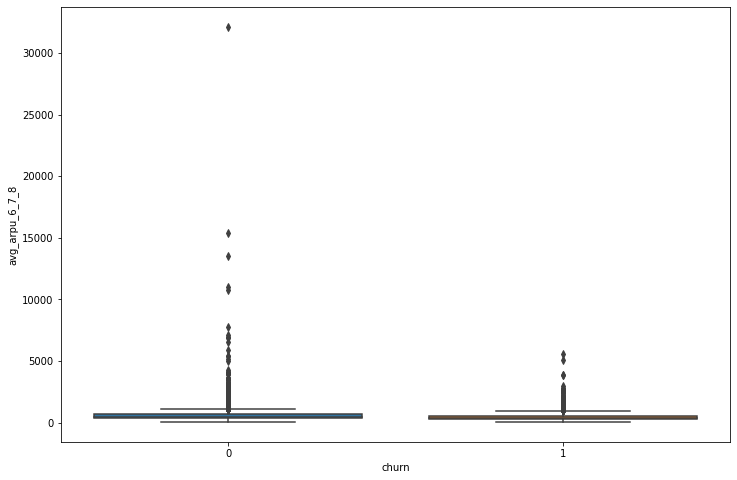

In [41]:
## We compared arpu with churn column to find any outlier in arpu using boxplot
plt.figure(figsize = (12,8))
sns.boxplot(x='churn', y='avg_arpu_6_7_8', data =telecom_hvc_final)
plt.show()

In [42]:
## IQR for indentification of outlier and treatment
Q1 = telecom_hvc_final['avg_arpu_6_7_8'].quantile(0.25)
Q3 = telecom_hvc_final['avg_arpu_6_7_8'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

292.3328333333334


In [43]:
#Find the lower 
lower_range=Q1 -(1.5 * IQR)
#Find the upper 
upper_range=Q3 + (1.5 * IQR)


In [44]:
telecom_hvc_final[(telecom_hvc_final.avg_arpu_6_7_8 < lower_range) | (telecom_hvc_final.avg_arpu_6_7_8 > upper_range)]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,avg_arpu_6_7_8
7,0.0,0.0,0.0,16.23,33.49,31.64,23.74,12.59,38.06,51.39,...,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1863.503333
33,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3,0,1328,358.10,2706.83,1714.67,0.0,1932.0,0,1249.694333
73,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,78.76,...,0,0,2283,0.00,0.00,0.00,0.0,2526.5,0,1665.987000
154,0.0,0.0,0.0,9.06,0.00,7.09,52.59,0.00,103.11,34.58,...,0,0,2477,5.68,0.00,0.00,0.0,1669.0,0,1541.261667
173,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,54.44,...,0,0,3471,0.00,0.00,0.00,0.0,1068.5,0,1163.509667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99720,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,228.16,...,0,0,264,135.40,206.37,264.50,13.0,1500.0,0,1456.348667
99821,0.0,0.0,0.0,0.00,156.91,332.56,0.00,396.71,731.11,21.33,...,0,0,245,0.00,0.00,0.00,0.0,1275.0,1,1526.760000
99822,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,724.16,...,0,0,3651,0.00,0.00,0.00,0.0,1878.0,0,1684.596000
99823,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,16.58,...,0,0,229,0.00,0.00,0.00,0.0,1463.5,0,1313.930667


In [45]:
## We are eliminting the outliers greater than upper range and less than lower range
telecom_hvc_final.drop(telecom_hvc_final[ (telecom_hvc_final.avg_arpu_6_7_8  >upper_range) | (telecom_hvc_final.avg_arpu_6_7_8  < lower_range) ].index , inplace=True)

In [46]:
telecom_hvc_final.shape

(28246, 122)

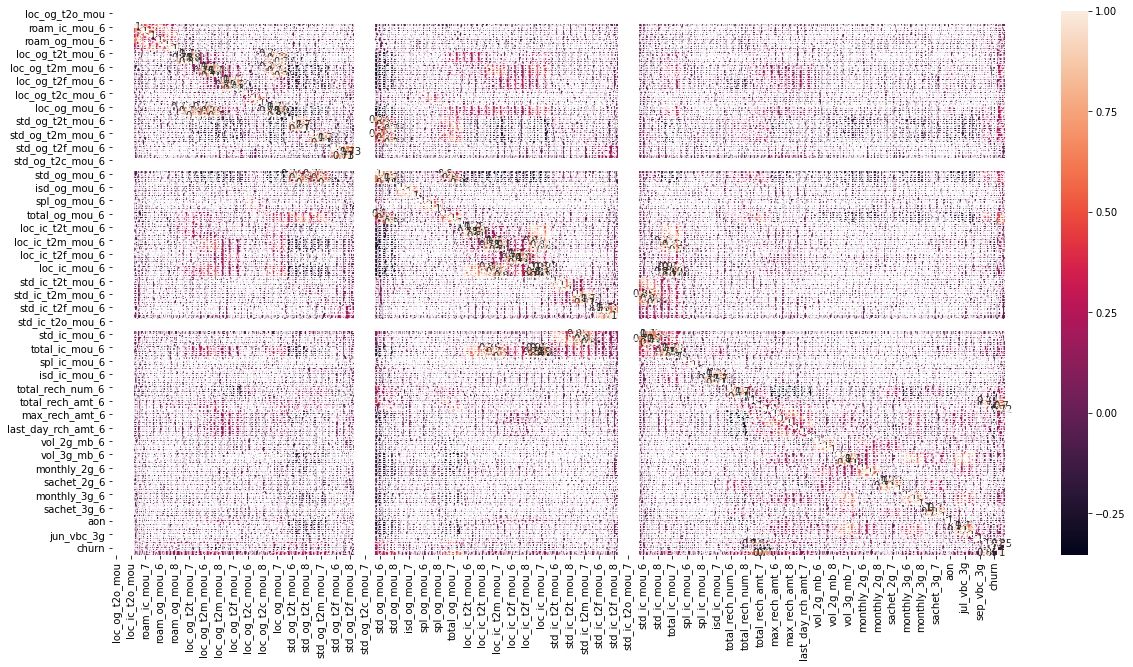

In [47]:
plt.subplots(figsize=(20,10))
sns.heatmap(telecom_hvc_final.corr(), annot =True)
plt.show()

In [48]:
## We are deriving a variable avg_rech_amt_6_7_8 which is the average recharge amount for month 6th 7th and 8th
telecom_hvc_final['avg_rech_amt_6_7_8']=(telecom_hvc_final['avg_rech_amt_6_7']+telecom_hvc_final['total_rech_amt_8'])/2

In [49]:
## Droping the redundant variables
telecom_hvc_final.drop(columns=['avg_rech_amt_6_7','total_rech_amt_8','total_rech_amt_6','total_rech_amt_7'],axis=1,inplace=True)
telecom_hvc_final.shape

(28246, 119)

In [50]:
telecom_hvc_final['avg_arpu_6_7_8']

8        336.102000
13       430.592333
16       306.246000
17       244.829000
21       583.322000
            ...    
99970    320.911333
99974    368.804000
99986    554.845000
99988    409.190000
99997    411.064667
Name: avg_arpu_6_7_8, Length: 28246, dtype: float64

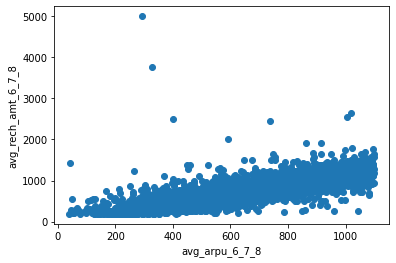

In [51]:
# Ploting scatterplot to identify if any relationship exists between avg_arpu_6_7_8 and avg_rech_amt_6_7_8
plt.scatter(x='avg_arpu_6_7_8', y='avg_rech_amt_6_7_8',data=telecom_hvc_final)
plt.xlabel('avg_arpu_6_7_8')
plt.ylabel('avg_rech_amt_6_7_8')
plt.show()

# Modelling

In [52]:
#Setting the independent X and dependent Y
X = telecom_hvc_final.drop(['churn'], axis=1)
X.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_arpu_6_7_8,avg_rech_amt_6_7_8
8,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,297.13,...,0,0,0,315,21.03,910.65,122.16,0.0,336.102000,319.5
13,0.0,0.0,0.0,23.53,144.24,72.11,7.98,35.26,1.44,49.63,...,0,0,0,2607,0.00,0.00,0.00,0.0,430.592333,548.5
16,0.0,0.0,0.0,0.00,2.83,0.00,0.00,17.74,0.00,42.61,...,0,0,0,511,0.00,2.45,21.89,0.0,306.246000,309.5
17,0.0,0.0,0.0,0.00,4.76,4.81,0.00,8.46,13.34,38.99,...,0,0,0,667,0.00,0.00,0.00,0.0,244.829000,219.0
21,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.48,...,0,0,0,720,0.00,0.00,0.00,0.0,583.322000,679.0


In [53]:
# y is our dependent varibale

y=telecom_hvc_final.churn
y.shape

(28246,)

In [54]:
# Train_Test Split in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [55]:
# Shape of training shape X
X_train.shape

(19772, 118)

In [56]:
# Shape of test set X
X_test.shape

(8474, 118)

In [57]:
y_train.shape

(19772,)

In [58]:
y_test.shape

(8474,)

### Columns needed to be scaled

In [59]:
scaling_cols=[
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g',
  'avg_arpu_6_7_8',
 'avg_rech_amt_6_7_8']



In [60]:
# Scaler object
scaler = MinMaxScaler()

In [61]:
# Actual Scaling of specific columns

X_train[scaling_cols]= scaler.fit_transform(X_train[scaling_cols])

In [62]:
X_train[scaling_cols].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_arpu_6_7_8,avg_rech_amt_6_7_8
count,19772.0,19772.0,19772.0,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,...,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000,19772.000000
mean,0.0,0.0,0.0,0.006088,0.003153,0.002700,0.011551,0.011074,0.009885,0.017079,...,0.004571,0.004063,0.004505,0.266807,0.017212,0.023445,0.016499,0.002225,0.441165,0.082958
std,0.0,0.0,0.0,0.028754,0.018596,0.015783,0.043452,0.046153,0.042341,0.041970,...,0.028840,0.026147,0.030213,0.240264,0.050565,0.069295,0.051313,0.017161,0.183941,0.052374
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001663,...,0.000000,0.000000,0.000000,0.073983,0.000000,0.000000,0.000000,0.000000,0.302578,0.045023
50%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006311,...,0.000000,0.000000,0.000000,0.180764,0.000000,0.000000,0.000000,0.000000,0.396600,0.071818
75%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016552,...,0.000000,0.000000,0.000000,0.426387,0.000000,0.000000,0.000000,0.000000,0.546177,0.111505
max,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Logistic Regression Model

In [63]:
## Feature Selection using RFE

In [64]:
# Creating a logistic regression model

logreg = LogisticRegression(class_weight='balanced')

In [65]:
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [66]:
# Result of RFE with selection and ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 104),
 ('std_og_t2o_mou', False, 103),
 ('loc_ic_t2o_mou', False, 102),
 ('roam_ic_mou_6', False, 42),
 ('roam_ic_mou_7', False, 27),
 ('roam_ic_mou_8', False, 33),
 ('roam_og_mou_6', False, 8),
 ('roam_og_mou_7', False, 16),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 5),
 ('loc_og_t2t_mou_7', False, 17),
 ('loc_og_t2t_mou_8', False, 76),
 ('loc_og_t2m_mou_6', False, 89),
 ('loc_og_t2m_mou_7', False, 77),
 ('loc_og_t2m_mou_8', False, 47),
 ('loc_og_t2f_mou_6', False, 79),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', False, 88),
 ('loc_og_t2c_mou_6', False, 39),
 ('loc_og_t2c_mou_7', False, 95),
 ('loc_og_t2c_mou_8', False, 65),
 ('loc_og_mou_6', False, 37),
 ('loc_og_mou_7', False, 48),
 ('loc_og_mou_8', False, 36),
 ('std_og_t2t_mou_6', False, 45),
 ('std_og_t2t_mou_7', False, 60),
 ('std_og_t2t_mou_8', False, 21),
 ('std_og_t2m_mou_6', False, 46),
 ('std_og_t2m_mou_7', False, 30),
 ('std_og_t2m_mou_8', False, 20),
 ('std_og_t2f_mou_6

In [67]:
# Selected Features
cols_selected = X_train.columns[rfe.support_]
list(cols_selected )

['roam_og_mou_8',
 'loc_og_t2f_mou_7',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_8',
 'loc_ic_mou_6',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sep_vbc_3g']

# Model 1

In [68]:
# Running logistic regression Using Stats model 

# Adding intercept
X_train_sm = sm.add_constant(X_train[cols_selected])

# running logistic regression 
logModel_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logModel_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19772
Model:                            GLM   Df Residuals:                    19756
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3756.2
Date:                Sat, 29 Aug 2020   Deviance:                       7512.3
Time:                        23:29:41   Pearson chi2:                 5.39e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5710      0.073     -7.776      0.000      -0.715      -0.427
roam_og_mou_8          3.4662      0.492      7.039      0.000       2.501       4.431
loc_og_t2f_mou_7      -1.8455      1.836     -1.005      0.315      -5.444       1.754
std_og_mou_7           2.0814      0.306      6.793      0.000       1.481       2.682
std_og_mou_8          35.5173      2.203     16.126      0.000      31.200      39.834
total_og_mou_8       -51.8292      2.773    -18.689      0.000     -57.265     -46.394
loc_ic_mou_6           5.2343      0.902      5.806      0.000       3.467       7.001
total_ic_mou_8       -16.1442      1.899     -8.502      0.000     -19.866     -12.422
total_rech_num_6       4.1909      1.020      4.108      0.000       2.191       6.191
total_rech_num_8      -9.5745      1.008     -9.503      0.000     -11.549      -7.600
max_rech_amt_8         2.2524      1.577      1.428      0.153      -0.839       5.344
last_day_rch_amt_8   -20.4995      2.385     -8.597      0.000     -25.173     -15.826
monthly_2g_8          -7.1185      0.975     -7.298      0.000      -9.030      -5.207
sachet_2g_8           -4.2138      1.123     -3.751      0.000      -6.416      -2.012
monthly_3g_8         -10.6312      1.418     -7.499      0.000     -13.410      -7.852
sep_vbc_3g           -39.1993     12.217     -3.209      0.001     -63.144     -15.255
======================================================================================
"""

In [69]:
### Since column loc_og_t2f_mou_7 is having high P value of .315 which is greater than .05 hence we are dropping it

In [70]:
cols_selected=cols_selected.drop('loc_og_t2f_mou_7')
cols_selected

Index(['roam_og_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [71]:
### Now using VIF for model 1
vif = pd.DataFrame()
vif['Features'] = X_train[cols_selected].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_selected].values, i) for i in range(X_train[cols_selected].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_8,7.97
2,std_og_mou_8,7.70
7,total_rech_num_8,4.24
8,max_rech_amt_8,4.11
1,std_og_mou_7,3.59
6,total_rech_num_6,3.23
5,total_ic_mou_8,3.15
9,last_day_rch_amt_8,2.97
4,loc_ic_mou_6,2.84
11,sachet_2g_8,1.30


In [72]:
### As VIF for total_og_mou_8 is 7.97 we will drop it

In [73]:
cols_selected=cols_selected.drop('total_og_mou_8')
len(cols_selected)

13

# Model 2

In [74]:
# Running logistic regression Using Stats model 

# Adding intercept
X_train_sm = sm.add_constant(X_train[cols_selected])

# running logistic regression 
logModel_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logModel_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19772
Model:                            GLM   Df Residuals:                    19758
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3985.8
Date:                Sat, 29 Aug 2020   Deviance:                       7971.6
Time:                        23:29:43   Pearson chi2:                 7.50e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3510      0.071     -4.945      0.000      -0.490      -0.212
roam_og_mou_8          4.7301      0.498      9.496      0.000       3.754       5.706
std_og_mou_7           1.9866      0.304      6.528      0.000       1.390       2.583
std_og_mou_8          -2.8468      0.656     -4.338      0.000      -4.133      -1.561
loc_ic_mou_6           6.2742      0.913      6.873      0.000       4.485       8.064
total_ic_mou_8       -40.1540      2.043    -19.657      0.000     -44.158     -36.150
total_rech_num_6       7.0110      1.050      6.677      0.000       4.953       9.069
total_rech_num_8     -15.9302      1.014    -15.715      0.000     -17.917     -13.943
max_rech_amt_8        -5.6833      1.770     -3.212      0.001      -9.152      -2.215
last_day_rch_amt_8   -29.7626      2.561    -11.622      0.000     -34.782     -24.743
monthly_2g_8          -6.2086      0.974     -6.375      0.000      -8.117      -4.300
sachet_2g_8           -4.1212      1.180     -3.491      0.000      -6.435      -1.808
monthly_3g_8          -6.7612      1.315     -5.142      0.000      -9.338      -4.184
sep_vbc_3g           -38.9241     12.439     -3.129      0.002     -63.304     -14.544
======================================================================================
"""

In [75]:
### VIF for Model 2
vif = pd.DataFrame()
vif['Features'] = X_train[cols_selected].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_selected].values, i) for i in range(X_train[cols_selected].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_rech_num_8,4.00
7,max_rech_amt_8,3.97
2,std_og_mou_8,3.85
1,std_og_mou_7,3.58
5,total_rech_num_6,3.22
4,total_ic_mou_8,2.97
8,last_day_rch_amt_8,2.96
3,loc_ic_mou_6,2.80
10,sachet_2g_8,1.29
11,monthly_3g_8,1.20


In [76]:
## We have got final set of varibales hence we will not drop any other variable

In [77]:
cols_selected

Index(['roam_og_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'loc_ic_mou_6',
       'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [78]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:13]

56254    0.181895
32401    0.006202
46794    0.129623
37160    0.010341
47078    0.195280
25327    0.022377
81255    0.088072
84044    0.043419
43775    0.034761
59927    0.073895
24549    0.010260
82957    0.000005
39961    0.031521
dtype: float64

In [79]:
# Now we will reshape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:13]

array([1.81894683e-01, 6.20222746e-03, 1.29623174e-01, 1.03411012e-02,
       1.95279719e-01, 2.23768696e-02, 8.80717892e-02, 4.34186281e-02,
       3.47606326e-02, 7.38949408e-02, 1.02596932e-02, 4.81593102e-06,
       3.15211756e-02])

In [80]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.181895
1,0,0.006202
2,0,0.129623
3,0,0.010341
4,0,0.195280


In [81]:
#Creating new column 'Churn_Predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['Churn_Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,Churn_Predicted
0,0,0.181895,0
1,0,0.006202,0
2,0,0.129623,0
3,0,0.010341,0
4,0,0.195280,0


In [82]:
# confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted )
print(confusion)

[[17771   243]
 [ 1280   478]]


In [83]:
# Actual/Predicted     not_churn   churn
        # not_churn       17771   243
        # churn            1280   478

In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted)

0.9229718794254501

# Metrics beyond accuracy

In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Calulating Precision

print (TP / float(TP+FP))

0.6629680998613038


# Plotting the ROC Curve

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

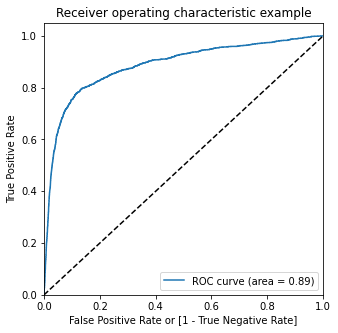

In [89]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

# Finding Optimal Cutoff Point

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.181895,0,1,1,0,0,0,0,0,0,0,0
1,0,0.006202,0,1,0,0,0,0,0,0,0,0,0
2,0,0.129623,0,1,1,0,0,0,0,0,0,0,0
3,0,0.010341,0,1,0,0,0,0,0,0,0,0,0
4,0,0.195280,0,1,1,0,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.088914  1.000000  0.000000
0.1   0.1  0.822324  0.813993  0.823138
0.2   0.2  0.900314  0.721843  0.917731
0.3   0.3  0.921606  0.631399  0.949928
0.4   0.4  0.929142  0.501706  0.970856
0.5   0.5  0.922972  0.271900  0.986510
0.6   0.6  0.916549  0.109784  0.995281
0.7   0.7  0.912654  0.035836  0.998224
0.8   0.8  0.912250  0.017065  0.999611
0.9   0.9  0.911491  0.006257  0.999833


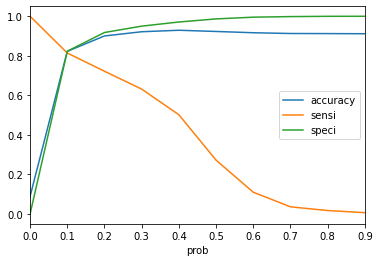

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

###### From the curve above, if we are taking 0.11 as optimum cutoff in that case precision is very low .By increasing the probabilty cutoff we are getting high precision hence we are taking an optimum cut off of 0.5

In [93]:
y_train_pred_final['Churn_final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,Churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Churn_final_predicted
0,0,0.181895,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.006202,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.129623,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.010341,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.195280,0,1,1,0,0,0,0,0,0,0,0,0


In [94]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Churn_final_predicted)

0.9229718794254501

In [95]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Churn_final_predicted )
confusion2

array([[17771,   243],
       [ 1280,   478]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Precison Positive predictive value 
print (TP / float(TP+FP))

0.6629680998613038


###### Making predictions on the test set

In [98]:
X_test['last_day_rch_amt_8']

56679      0
97916    144
86524    130
69881    130
29310    130
        ... 
26600      0
23616     50
87920     30
94047     50
10204      0
Name: last_day_rch_amt_8, Length: 8474, dtype: int64

In [99]:
cols_selected

Index(['roam_og_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'loc_ic_mou_6',
       'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [100]:
X_test[scaling_cols]=scaler.transform(X_test[scaling_cols])
    


In [101]:
# X features of Test set
# Data is already scaled earlier by MInMax Scaler
X_test=X_test[cols_selected]

X_test.head()

,roam_og_mou_8,std_og_mou_7,std_og_mou_8,loc_ic_mou_6,total_ic_mou_8,total_rech_num_6,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sep_vbc_3g
56679,0.001541,0.004127,0.000000,0.010723,0.000000,0.107492,0.021739,0.000000,0.000000,0.0,0.000000,0.0,0.000000
97916,0.000000,0.015939,0.010095,0.028661,0.040532,0.019544,0.036232,0.032367,0.032367,0.0,0.029412,0.0,0.000000
86524,0.000000,0.000077,0.000000,0.018826,0.026754,0.016287,0.014493,0.029220,0.029220,0.0,0.000000,0.0,0.000000
69881,0.000000,0.134355,0.140680,0.009105,0.013169,0.039088,0.043478,0.029220,0.029220,0.0,0.000000,0.0,0.000000
29310,0.000000,0.000024,0.000090,0.039116,0.173185,0.058632,0.108696,0.031468,0.029220,0.0,0.000000,0.0,0.033388


In [102]:
X_test.shape

(8474, 13)

In [103]:
# Adding a constant for statsmodel prediction
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,roam_og_mou_8,std_og_mou_7,std_og_mou_8,loc_ic_mou_6,total_ic_mou_8,total_rech_num_6,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sep_vbc_3g
56679,1.0,0.001541,0.004127,0.000000,0.010723,0.000000,0.107492,0.021739,0.000000,0.000000,0.0,0.000000,0.0,0.000000
97916,1.0,0.000000,0.015939,0.010095,0.028661,0.040532,0.019544,0.036232,0.032367,0.032367,0.0,0.029412,0.0,0.000000
86524,1.0,0.000000,0.000077,0.000000,0.018826,0.026754,0.016287,0.014493,0.029220,0.029220,0.0,0.000000,0.0,0.000000
69881,1.0,0.000000,0.134355,0.140680,0.009105,0.013169,0.039088,0.043478,0.029220,0.029220,0.0,0.000000,0.0,0.000000
29310,1.0,0.000000,0.000024,0.000090,0.039116,0.173185,0.058632,0.108696,0.031468,0.029220,0.0,0.000000,0.0,0.033388


In [104]:
# Actual prediction , probability score on test set
y_test_pred = result.predict(X_test_sm)

In [105]:
y_test_pred[:13]

56679    0.534710
97916    0.029186
86524    0.078749
69881    0.082372
29310    0.000022
19072    0.014906
58035    0.043205
4658     0.618877
68460    0.027666
41764    0.009745
12856    0.027083
55341    0.011768
16566    0.010661
dtype: float64

In [106]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [107]:
y_pred_1.head()

,0
56679,0.534710
97916,0.029186
86524,0.078749
69881,0.082372
29310,0.000022


In [108]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [109]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [110]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [111]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [112]:
y_pred_final.head()

,churn,CustID,0
0,1,56679,0.534710
1,0,97916,0.029186
2,0,86524,0.078749
3,0,69881,0.082372
4,0,29310,0.000022


In [113]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [114]:
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,CustID,Churn_Prob
0,1,56679,0.534710
1,0,97916,0.029186
2,0,86524,0.078749
3,0,69881,0.082372
4,0,29310,0.000022


In [115]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [116]:
y_pred_final.head()

,churn,CustID,Churn_Prob,final_predicted
0,1,56679,0.534710,1
1,0,97916,0.029186,0
2,0,86524,0.078749,0
3,0,69881,0.082372,0
4,0,29310,0.000022,0


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.9280151050271418

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[7661,   99],
       [ 511,  203]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Precison Positive predictive value 
print (TP / float(TP+FP))

0.6721854304635762


###### From the analysis both on train and test  data accuracy is 92% approx where as for Prescion for train data  as well as test data  it is 67% approx 


#  Decesion tree model

In [121]:
# Spliting the data in X and y variable
X = telecom_hvc_final.drop(['churn'], axis=1)
y=telecom_hvc_final.churn

In [122]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [123]:
X_train.shape ,X_test.shape

((19772, 118), (8474, 118))

In [124]:
# Importing relevant  decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [125]:
dt_base=DecisionTreeClassifier(random_state=42,max_depth=4)

In [126]:
dt_base.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

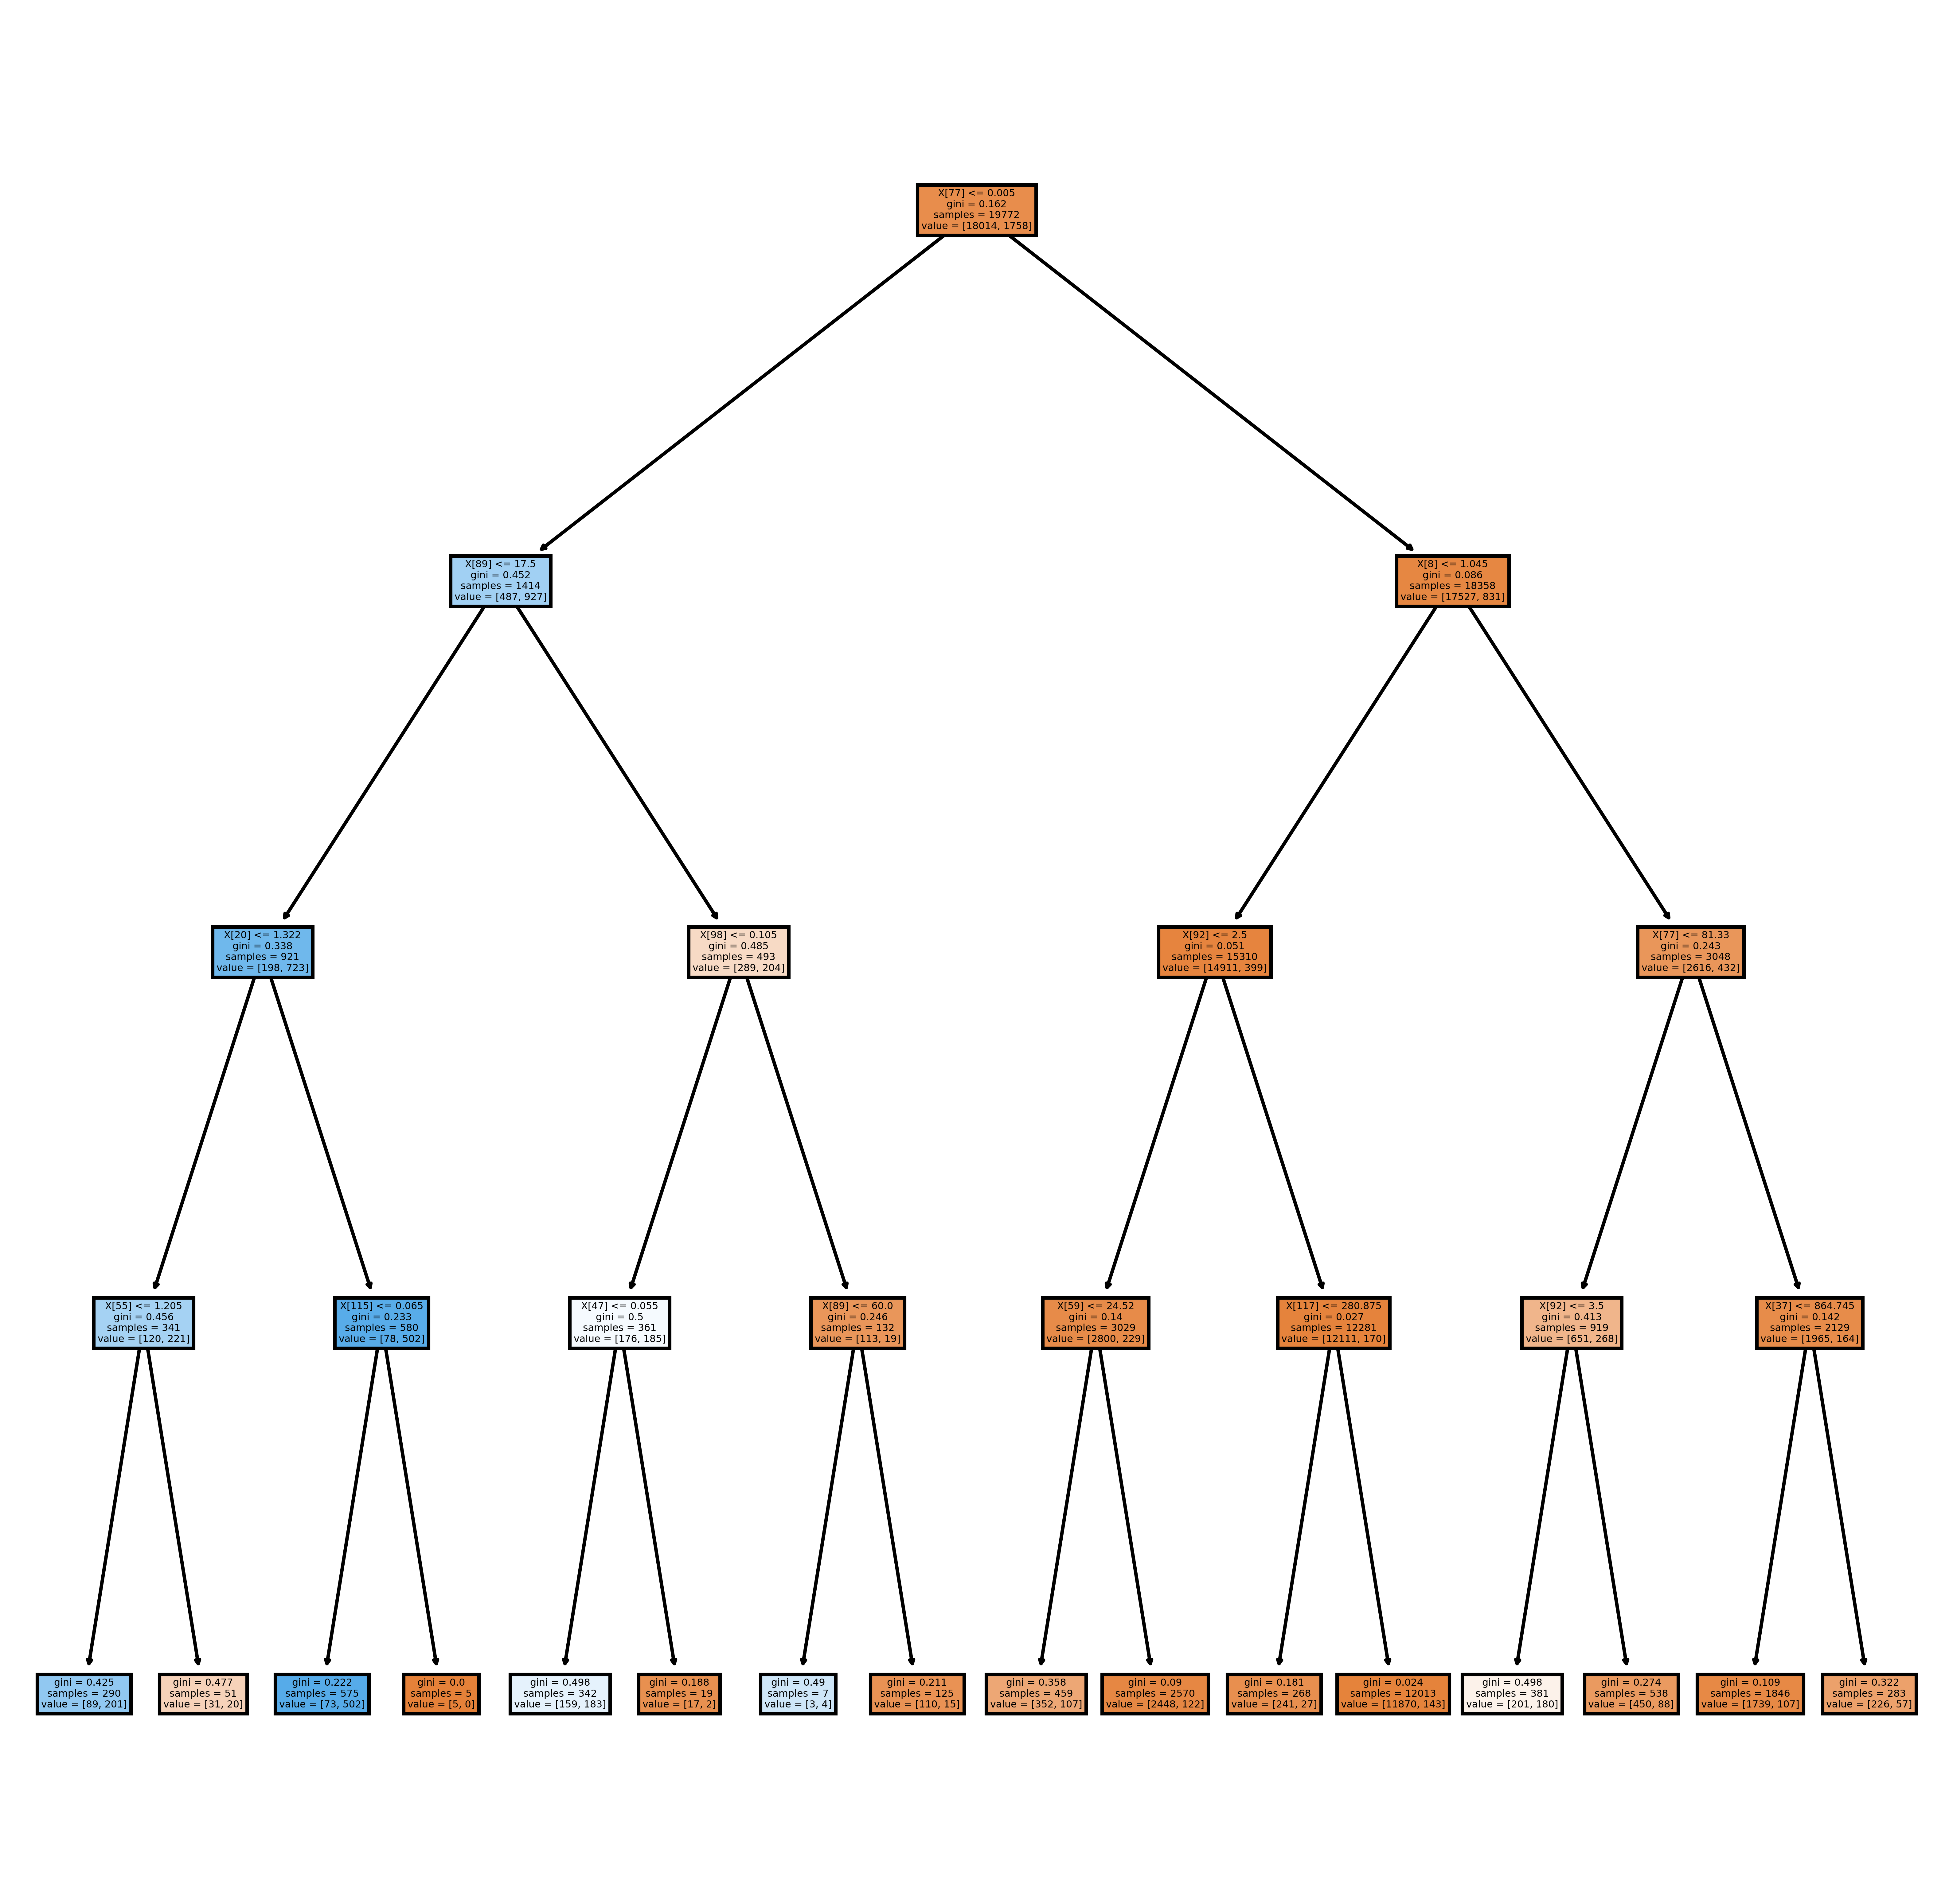

In [127]:
#Ploting Decision Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)

tree.plot_tree(dt_base,filled=True)
fig.savefig('imagename.png')

In [128]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7760
           1       0.72      0.50      0.59       714

    accuracy                           0.94      8474
   macro avg       0.84      0.74      0.78      8474
weighted avg       0.93      0.94      0.94      8474



In [131]:
## Plot ROC
from sklearn.metrics import plot_roc_curve

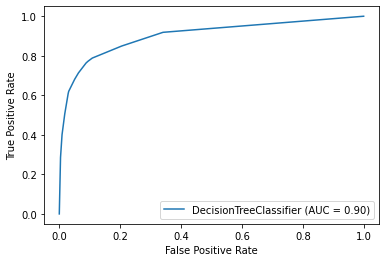

In [132]:

plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

### Hyper-parameter tuning for the Decision Tree

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
dt = DecisionTreeClassifier(random_state=42)

In [135]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [136]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="precision")

In [137]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.3min finished


Wall time: 1min 16s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='precision', verbose=1)

In [138]:
grid_search.best_score_

0.7623760132917894

In [139]:
dt_best = grid_search.best_estimator_
dt_best # Final model is build with max_depth=2, min_samples_leaf=5

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

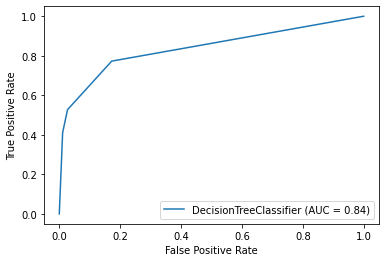

In [140]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

# Random Forest Model

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [143]:
%%time
rf.fit(X_train, y_train)

Wall time: 421 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [144]:
rf.oob_score_

0.9330366174388024

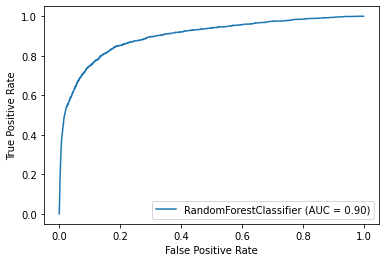

In [145]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

# Hyper-parameter tuning for the Random Forest

In [146]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [147]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [148]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="precision")

In [149]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.4min finished


Wall time: 8min 23s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='precision', verbose=1)

In [150]:
grid_search.best_score_

0.9315934065934066

In [151]:
rf_best = grid_search.best_estimator_
rf_best # Final build is made with max_depth=2, min_samples_leaf=5

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

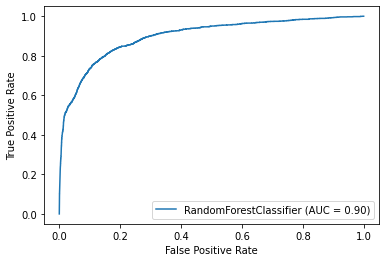

In [152]:
# Plot ROC
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [153]:
rf_best.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.16783484e-02, 7.10101106e-02, 0.00000000e+00, 1.53596693e-03,
       8.50574894e-02, 0.00000000e+00, 2.93035455e-03, 1.91093367e-02,
       0.00000000e+00, 1.83368216e-03, 3.24534673e-02, 7.83426134e-04,
       2.71739006e-03, 7.82404259e-03, 0.00000000e+00, 0.00000000e+00,
       1.01026293e-02, 0.00000000e+00, 1.35448833e-03, 3.08641650e-02,
       2.45079914e-05, 0.00000000e+00, 4.37735756e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.64295132e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.41661271e-03, 1.56709356e-04, 1.41432912e-03, 0.00000000e+00,
       0.00000000e+00, 3.16539498e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.41983463e-04, 6.57916540e-03, 1.48723355e-01,
       0.00000000e+00, 1.13620831e-03, 1.62760800e-02, 0.00000000e+00,
       0.00000000e+00, 5.87434981e-02, 9.37178167e-05, 1.76811934e-04,
      

In [154]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [155]:
# Getting final set of variables with its importance sorted in decending order
imp_df.sort_values(by="Imp", ascending=False).head(20)


,Varname,Imp
47,total_og_mou_8,0.148723
89,max_rech_amt_8,0.103938
77,total_ic_mou_8,0.102412
8,roam_og_mou_8,0.085057
5,roam_ic_mou_8,0.071010
53,loc_ic_t2m_mou_8,0.058743
92,last_day_rch_amt_8,0.049352
59,loc_ic_mou_8,0.036815
14,loc_og_t2m_mou_8,0.032453
41,isd_og_mou_8,0.031654


In [156]:
#Considering the top 11 variables for final recommendation.Variables considered having importance percentage>=3%
imp_params=imp_df.sort_values(by="Imp", ascending=False).head(11) 
imp_params

,Varname,Imp
47,total_og_mou_8,0.148723
89,max_rech_amt_8,0.103938
77,total_ic_mou_8,0.102412
8,roam_og_mou_8,0.085057
5,roam_ic_mou_8,0.071010
53,loc_ic_t2m_mou_8,0.058743
92,last_day_rch_amt_8,0.049352
59,loc_ic_mou_8,0.036815
14,loc_og_t2m_mou_8,0.032453
41,isd_og_mou_8,0.031654


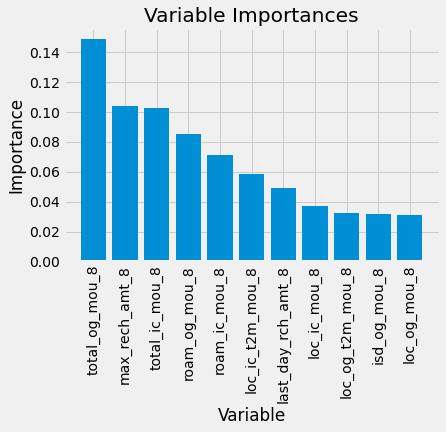

In [157]:
# After identifying important predictors, display them visually


# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(imp_params.Imp)))
# Make a bar chart
plt.bar(x_values, imp_params.Imp, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values,imp_params.Varname, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

###### Recommendation to Company:
###### Out of all the 3 model which we have created Random forest is giving the best outcome hence we have selected this model
###### All the  important parameters that play important role in  deciding  whether customer will churn out or not belogs to  month 8th.
###### Company should keep a trak of variables  such as 
###### ->total outgoing minutes of usage ,
###### ->Maximum recharge amount,
###### ->Total incoming minute of usage
###### ->roaming outgoing minutes of usage
###### ->roaming incoming  minutes of usage
###### ->Total incoming T2M minutes of usage,Last day rechagre amount
###### ->Local incoming minutes of usage
###### ->Local T2M outgoing minutes of usage
###### ->ISD outgoing minutes of usage 
###### and ->Local outgoing minutes of usage

###### These are the top 11 Influential parameters of action phase which the company should keep a track of and in turn 
###### will help the company to indentify the customers who may churn out. This will help the company to target those 
###### customers and come up with differnt strategies like 
###### ->offering outgoing calls at low rate
###### ->giving more benefit on high value recharges 
###### ->Cross validating the network connectivity in case the incomining calls are going down
###### ->Giving discount on roaming and ISD calls 
###### will help the company in retaing the customer who may chun out otherwise



======================================================END=======================================================